Question 1

In [171]:
!pip install pmdarima
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import warnings
import statsmodels.api as sm

print("Harish P")
print("21BBS0204")

Harish P
21BBS0204


In [172]:
print("Harish P")
print("21BBS0204")

df = pd.read_csv('/content/Arima.csv')
df['Date'] = df['Date'].str.strip()
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.head(5)

print(f"Index Start: {df.index.min()}")
print(f"Index End: {df.index.max()}")

df.head(5)

Harish P
21BBS0204
Index Start: 0
Index End: 1753


,Date,Price,Open,High,Low,Vol.,Change %,Unnamed: 7,Unnamed: 8
0,2017-10-03,416,428,428,415,9.70M,3.61%,NaN,NaN
1,2017-10-04,423.55,417.55,426,412.7,7.66M,1.81%,NaN,NaN
2,2017-10-05,423.3,423,425.8,420.1,4.61M,-0.06%,NaN,NaN
3,2017-10-06,424.85,422,426,416.2,5.31M,0.37%,NaN,NaN
4,2017-10-09,425.6,424,432.1,423.05,4.41M,0.18%,NaN,NaN


In [173]:
print("Harish P")
print("21BBS0204")

df['Parsed_Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
failed_parsing = df[df['Parsed_Date'].isnull()]

if not failed_parsing.empty:
    print("Rows with parsing errors:")
    print(failed_parsing['Date'])
else:
    print("All dates parsed successfully.")

df = df.set_index('Parsed_Date')
df = df.sort_index(ascending=True)
print(f"Index Start: {df.index.min()}")
print(f"Index End: {df.index.max()}")


Harish P
21BBS0204
All dates parsed successfully.
Index Start: 2017-10-03 00:00:00
Index End: 2024-10-30 00:00:00


In [174]:
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''), errors='coerce')

In [175]:
print("Harish P")
print("21BBS0204")

df['MA_50'] = df['Price'].rolling(window=50).mean()
df['MA_200'] = df['Price'].rolling(window=200).mean()
df['MA_365'] = df['Price'].rolling(window=365).mean()
df['MA_500'] = df['Price'].rolling(window=500).mean()
print(df[['Price', 'MA_50', 'MA_200', 'MA_365', 'MA_500']].tail(10))

Harish P
21BBS0204
              Price     MA_50     MA_200      MA_365     MA_500
Parsed_Date                                                    
2024-10-17   891.60  1011.416  969.05910  809.929699  705.68000
2024-10-18   910.15  1009.113  969.72210  811.102137  706.70476
2024-10-21   903.30  1006.344  970.29775  812.263726  707.72130
2024-10-22   879.50  1002.572  970.78530  813.370219  708.69054
2024-10-23   877.65   998.602  971.27830  814.407726  709.63982
2024-10-24   880.00   995.133  971.71180  815.443068  710.60418
2024-10-25   864.30   991.172  972.09070  816.419425  711.53902
2024-10-28   878.45   986.774  972.54960  817.428795  712.50226
2024-10-29   842.75   981.875  972.77665  818.328493  713.38704
2024-10-30   850.80   977.153  973.00085  819.209534  714.28202


Harish P
21BBS0204
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=inf, Time=27.32 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=14172.801, Time=0.08 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=13645.485, Time=1.12 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=inf, Time=3.48 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=13643.934, Time=0.11 sec
 ARIMA(1,2,0)(0,0,1)[12]             : AIC=13645.450, Time=1.23 sec
 ARIMA(1,2,0)(1,0,1)[12]             : AIC=13646.524, Time=5.68 sec
 ARIMA(2,2,0)(0,0,0)[12]             : AIC=13494.741, Time=0.72 sec
 ARIMA(2,2,0)(1,0,0)[12]             : AIC=13496.389, Time=2.24 sec
 ARIMA(2,2,0)(0,0,1)[12]             : AIC=13496.367, Time=2.60 sec
 ARIMA(2,2,0)(1,0,1)[12]             : AIC=13497.785, Time=2.10 sec
 ARIMA(3,2,0)(0,0,0)[12]             : AIC=13380.270, Time=0.29 sec
 ARIMA(3,2,0)(1,0,0)[12]             : AIC=13381.139, Time=0.80 sec
 ARIMA(3,2,0)(0,0,1)[12]             : AIC=13381.032, Time=2.09 s

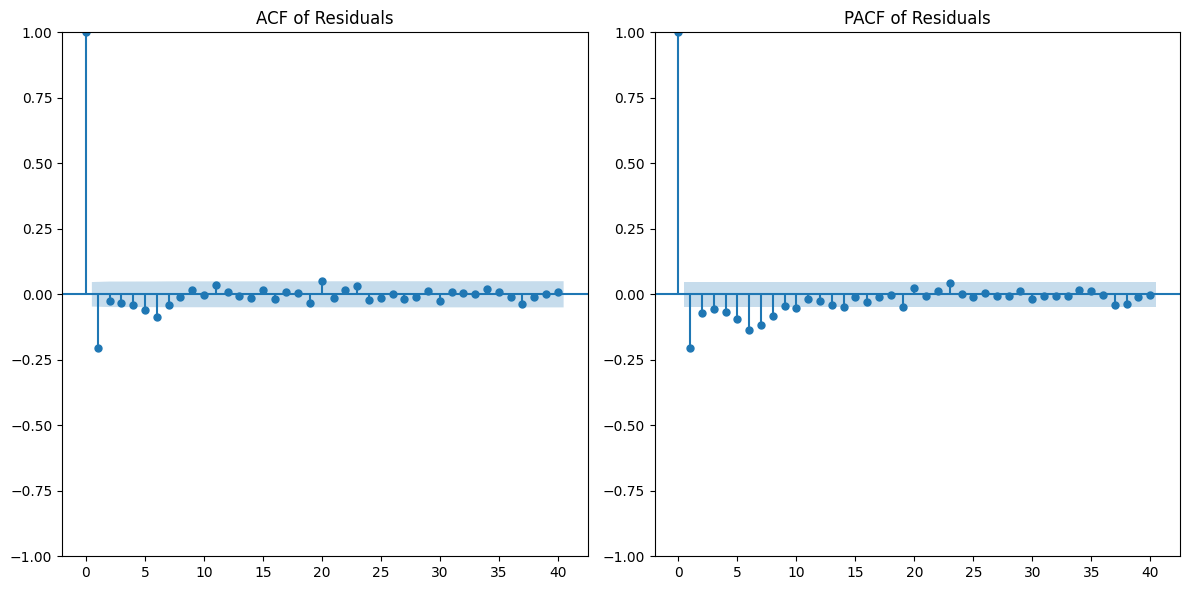

In [176]:
print("Harish P")
print("21BBS0204")

model = auto_arima(df['Price'], seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)
residuals = model.resid()

lags = 40
acf_values = sm.tsa.stattools.acf(residuals, nlags=lags)
pacf_values = sm.tsa.stattools.pacf(residuals, nlags=lags)

print("Autocorrelation Function (ACF) Summary:")
for lag, value in enumerate(acf_values):
    print(f"Lag {lag}: ACF = {value:.4f}")

print("\nPartial Autocorrelation Function (PACF) Summary:")
for lag, value in enumerate(pacf_values):
    print(f"Lag {lag}: PACF = {value:.4f}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot_acf(residuals, lags=lags, ax=ax1)
ax1.set_title('ACF of Residuals')

plot_pacf(residuals, lags=lags, ax=ax2)
ax2.set_title('PACF of Residuals')

plt.tight_layout()
plt.show()

In [177]:
print("Harish P")
print("21BBS0204")

df.index = pd.to_datetime(df.index)
df = df.asfreq('D')

model = ARIMA(df['Price'], order=(5, 2, 0))
model_fit = model.fit()
forecast_steps = 75
forecast = model_fit.predict(start=0, end=len(df['Price']) + forecast_steps - 1, dynamic=False)
for i in range(0,10):
  print(forecast[i])

Harish P
21BBS0204
0.0
623.9993031511876
431.1363491060717
427.11904599197646
428.03864726467776
431.2251569439072
434.0956813291116
427.4244508709655
423.86494366232023
415.21747246698584


<ipython-input-177-b25e2ff8ff31>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(forecast[i])


Harish P
21BBS0204


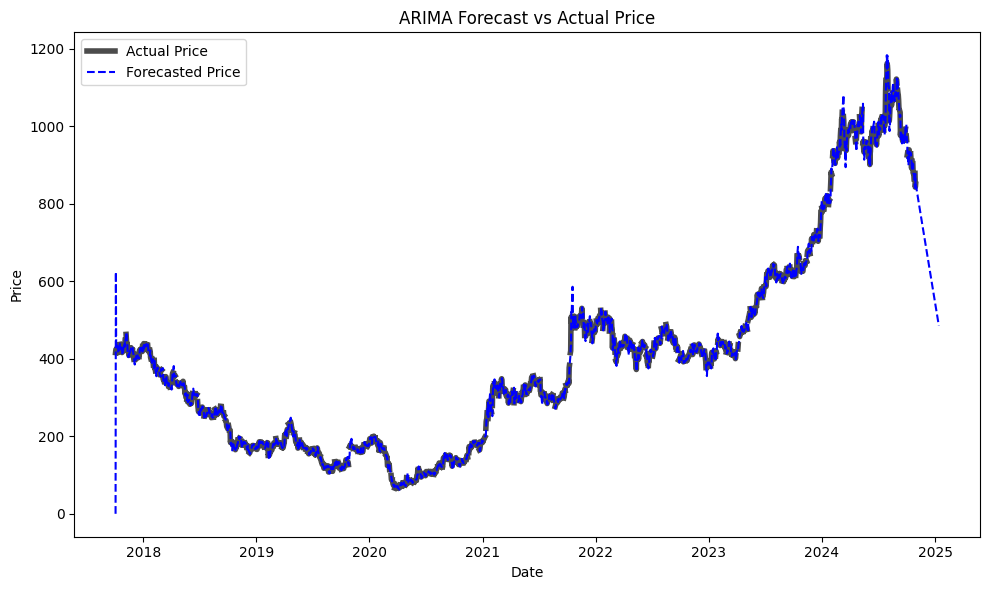

In [178]:
print("Harish P")
print("21BBS0204")
total_periods = len(df) + forecast_steps
forecast_index = pd.date_range(start=df.index[0], periods=total_periods, freq='D')
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'], label='Actual Price', color='black', alpha=0.7,linewidth=4.0)
plt.plot(forecast_index, forecast, label='Forecasted Price', color='blue', linestyle='--')
plt.title('ARIMA Forecast vs Actual Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

Question 2

In [179]:
print("Harish P")
print("21BBS0204")

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings

Harish P
21BBS0204


In [180]:
df = pd.read_csv('/content/Logistic.csv')
df.head(2)

,CGPA,GRE_Score,TOEFL_Score,Research_Papers,Projects,Internships,Admitted
0,9.2,332,118,3,7,4,1
1,8.7,321,109,1,4,2,1


In [181]:
x =df.drop(columns =['Admitted'],axis =1)
y=df.Admitted

In [182]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 130)

In [183]:
print("Harish P")
print("21BBS0204")

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning)
    log = LogisticRegression()
    log.fit(x_train,y_train)

Harish P
21BBS0204


In [184]:
pred = log.predict(x_test)

In [185]:
accuracy_score(y_test,pred)

0.9259259259259259

In [186]:
pd.crosstab(y_test,pred)

col_0,0,1
Admitted,,
0,10,1
1,1,15


In [187]:
print("Harish P")
print("21BBS0204")

print(classification_report(y_test,pred))

Harish P
21BBS0204
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.94      0.94      0.94        16

    accuracy                           0.93        27
   macro avg       0.92      0.92      0.92        27
weighted avg       0.93      0.93      0.93        27



In [188]:
intercept = log.intercept_[0]
coefficients = log.coef_[0]

print("The Logit Function is: ")
logit_function = (
    f"logit(p) = {intercept:.4f} + "
    f"{coefficients[0]:.4f} * CGPA + "
    f"{coefficients[1]:.4f} * GRE + "
    f"{coefficients[2]:.4f} * TOEFL + "
    f"{coefficients[3]:.4f} * Researchs + "
    f"{coefficients[4]:.4f} * Projects + "
    f"{coefficients[5]:.4f} * Internships"
)
print(logit_function)

The Logit Function is: 
logit(p) = -0.1057 + 0.2360 * CGPA + -0.1263 * GRE + 0.3487 * TOEFL + -0.2192 * Researchs + 0.1285 * Projects + 0.5381 * Internships


In [189]:
print("Harish P")
print("21BBS0204")

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning)
    new_entry = [[9.39, 322, 113, 1, 5, 1]]

    probability = log.predict_proba(new_entry)[:, 1]
    print(f"Predicted Probability: {probability[0]:.4f}")

Harish P
21BBS0204
Predicted Probability: 0.8578


In [190]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning)
    for index, row in x_test.iterrows():
        probability = log.predict_proba([row.values])[:, 1]
        print(f"Predicted Probability for entry {index}: {probability[0]:.4f}")


Predicted Probability for entry 73: 0.2202
Predicted Probability for entry 6: 0.9570
Predicted Probability for entry 70: 0.6958
Predicted Probability for entry 52: 0.7862
Predicted Probability for entry 43: 0.3438
Predicted Probability for entry 105: 0.8937
Predicted Probability for entry 86: 0.0892
Predicted Probability for entry 99: 0.8680
Predicted Probability for entry 26: 0.1015
Predicted Probability for entry 37: 0.2202
Predicted Probability for entry 35: 0.0568
Predicted Probability for entry 49: 0.2906
Predicted Probability for entry 42: 0.9435
Predicted Probability for entry 107: 0.0568
Predicted Probability for entry 3: 0.9313
Predicted Probability for entry 46: 0.6915
Predicted Probability for entry 57: 0.9398
Predicted Probability for entry 83: 0.1295
Predicted Probability for entry 54: 0.9852
Predicted Probability for entry 28: 0.7368
Predicted Probability for entry 85: 0.2906
Predicted Probability for entry 33: 0.9352
Predicted Probability for entry 18: 0.9869
Predicted P